In [1]:
name = "Muhammad Hazique Khatri"
seatNo = "B18101071"
semester = "7th Semester"

In [2]:
#Student Information
print("Name: {}, Seat Number: {}, Semester: {}".format(name, seatNo, semester))

Name: Muhammad Hazique Khatri, Seat Number: B18101071, Semester: 7th Semester


In [3]:
#Import Statements
#Pandas library
import pandas as pd
#Regix
import re
#nltk library
import nltk 
from nltk.corpus import stopwords
import nltk as nlp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
#Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
#Accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
#reading csv file
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


In [5]:
#Storing in df vairable
df = pd.read_csv("fake_job_postings.csv")

In [6]:
#Getting first n rows
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
#Getting information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
#Getting shape of the dataframe
df.shape

(17880, 18)

In [9]:
#Calculating information like mean, std, min....
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Printing columns
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [11]:
del df["salary_range"]
del df["job_id"]

In [12]:
#Turning all data into single text format
df.fillna(" ",inplace = True)
df['text']=df['title']+" "+df['location']+" "+df['department']+" "+df['company_profile']+" "+df['description']+" "+df['requirements']+" "+df['benefits']+" "+df['employment_type']+" " +df['required_education']+" "+df['industry']+" "+df['function'] 
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,text
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0,"Marketing Intern US, NY, New York Marketing We..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,,,,,,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC US, DC, Wash..."
4,Bill Review Manager,"US, FL, Fort Worth",,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [13]:
#Deleting unnecessary information from data
del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']

In [14]:
#Getting first n rows again
df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,text
0,0,1,0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,1,0,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,1,0,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,1,1,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [17]:
#Now preprocssing on text data
#Downloads
nltk.download('punkt')
nltk.download('wordnet')
#Function
text_list = []
for text in df.text:
    text= re.sub("[^a-zA-Z]"," ",text) 
    text = text.lower()   
    text = nltk.word_tokenize(text)
    lemma = nlp.WordNetLemmatizer() 
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text) 
    text_list.append(text) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [18]:
#Using Bag of Words:
 
max_features = 150    # 150 most used words in text.
# We delete non-English words with stop_words.
count_vectorizer = CountVectorizer(max_features=max_features, stop_words = "english") 

# We fit our method on the texts and make the result a list.
sparce_matrix = count_vectorizer.fit_transform(text_list).toarray() 

print("The most commonly used {} words :{}".format(max_features,count_vectorizer.get_feature_names()))
x = sparce_matrix
y = df.iloc[:,3].values 

The most commonly used 150 words :['ability', 'able', 'account', 'agency', 'amp', 'application', 'apply', 'area', 'bachelor', 'based', 'benefit', 'best', 'brand', 'build', 'building', 'business', 'ca', 'candidate', 'care', 'career', 'client', 'communication', 'company', 'competitive', 'computer', 'content', 'create', 'creative', 'customer', 'data', 'day', 'degree', 'design', 'develop', 'developer', 'development', 'digital', 'drive', 'education', 'employee', 'engineer', 'engineering', 'ensure', 'environment', 'excellent', 'experience', 'fast', 'financial', 'global', 'goal', 'good', 'great', 'growing', 'growth', 'ha', 'health', 'help', 'high', 'highly', 'home', 'hour', 'include', 'including', 'individual', 'industry', 'information', 'job', 'join', 'knowledge', 'lead', 'leading', 'level', 'life', 'like', 'll', 'looking', 'love', 'make', 'manage', 'management', 'manager', 'market', 'marketing', 'medium', 'member', 'mobile', 'need', 'network', 'new', 'offer', 'office', 'online', 'operation'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
# We separated our data as train and test with a ratio of 0.2
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [20]:
#Storing algorithm names in array
names = ["Logistic Regeression","Naive Bayes","Decision Tree Entropy","Decision Tree Gini"]
#Making an empty array for storing accuracy
values = []

In [21]:
#Using Logistic Regression and calculating its accuracy and confusion matrix
lr = LogisticRegression(random_state=0, solver="newton-cg")
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression: ", accuracy)
values.append(accuracy)
matrixC = confusion_matrix(y_test, y_pred)
print("Logistic Regression Confusion matrix \n", matrixC)

Accuracy of Logistic Regression:  0.9555369127516778
Logistic Regression Confusion matrix 
 [[3371   24]
 [ 135   46]]


In [22]:
#Using Naive Bayes and calculating its accuracy and confusion matrix
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes: ", accuracy)
values.append(accuracy)
matrixC = confusion_matrix(y_test, y_pred)
print("Naive Bayes Confusion matrix \n", matrixC)

Accuracy of Naive Bayes:  0.6160514541387024
Naive Bayes Confusion matrix 
 [[2050 1345]
 [  28  153]]


In [23]:
#Using Decision Tree Entropy and calculating its accuracy and confusion matrix
dte = DecisionTreeClassifier(criterion='entropy', random_state=0)
dte.fit(x_train,y_train)
y_pred = dte.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
values.append(accuracy)
print("Accuracy of Decision Tree Entropy: ", accuracy)
matrixC = confusion_matrix(y_test, y_pred)
print("Decision Tree Entropy Confusion matrix \n", matrixC)

Accuracy of Decision Tree Entropy:  0.959731543624161
Decision Tree Entropy Confusion matrix 
 [[3325   70]
 [  74  107]]


In [24]:
#Using Decision Tree Gini and calculating its accuracy and confusion matrix
dtg = DecisionTreeClassifier(criterion='gini', random_state=0)
dtg.fit(x_train,y_train)
y_pred = dtg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
values.append(accuracy)
print("Accuracy of Decision Tree Gini: ", accuracy)
matrixC = confusion_matrix(y_test, y_pred)
print("Decision Tree Entropy Confusion matrix \n", matrixC)

Accuracy of Decision Tree Gini:  0.9555369127516778
Decision Tree Entropy Confusion matrix 
 [[3312   83]
 [  76  105]]


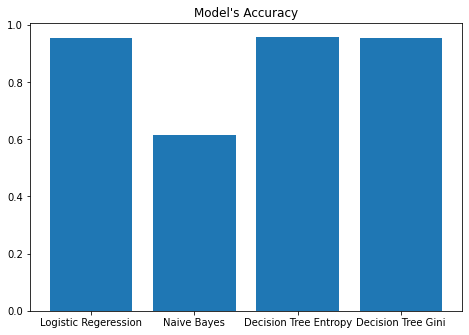

Logistic Regeression Accuracy =  0.9555369127516778
Naive Bayes Accuracy =  0.6160514541387024
Decision Tree Entropy Accuracy =  0.959731543624161
Decision Tree Gini Accuracy =  0.9555369127516778


In [25]:
#Model accuracy box plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,values)
plt.title("Model's Accuracy")
plt.show()
for i in range(len(names)):
  print(names[i], "Accuracy = ", values[i])

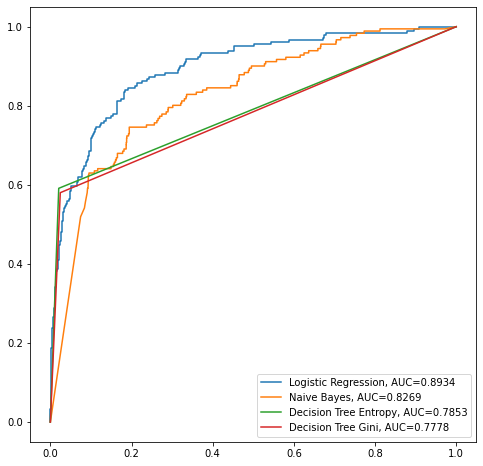

In [26]:
#Now ploting ROC curve

#Importing metrics library
from sklearn import metrics

fig = plt.figure() 

fig.set_size_inches(8, 8)

#ROC for Logistic Regression
y_pred1 = lr.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred1)
auc = round(metrics.roc_auc_score(y_test, y_pred1), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#ROC for Naive Bayes
y_pred2 = nb.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred2)
auc = round(metrics.roc_auc_score(y_test, y_pred2), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

#ROC for Decision Tree Entropy
y_pred3 = dte.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred3)
auc = round(metrics.roc_auc_score(y_test, y_pred3), 4)
plt.plot(fpr,tpr,label="Decision Tree Entropy, AUC="+str(auc))

#ROC for Decision Tree Gini
y_pred4 = dtg.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred4)
auc = round(metrics.roc_auc_score(y_test, y_pred4), 4)
plt.plot(fpr,tpr,label="Decision Tree Gini, AUC="+str(auc))

plt.legend()

In [28]:
print("On the basis of accuracy Decision Tree Gini performing best, while Naive Bayes contains Low accuracy.")

On the basis of accuracy Decision Tree Gini performing best, while Naive Bayes contains Low accuracy.
